In [32]:
#code by Abhay Pratap Singh
# generate pseduo label images using set of images 
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import copy

In [33]:
# generate  j[0] scale with all chanels = R = G = B = grayscale
# Y = 0.2125 R + 0.7154 G + 0.0721 B
# These weights are used by CRT phosphors as they better represent human perception of red, green and blue than equal weights.
# http://www.poynton.com/PDFs/ColorFAQ.pdf
# take img a input 
def GrayScalePL(image):
    img = copy.deepcopy(image)
    grayscale = rgb2gray(img)
    return np.stack((grayscale,)*3, axis=-1)


In [45]:
# generate patched images for pseudo labels (eg: image inpainting)
# patches can be made on individual channels 
# patch shape is square by default
# patch can either be 0-100% area of the img
# rotate patch between [0,90)
# take image, patch size percentage, which channels to use, fill value,degree*
# *not yet implemented
def RandomPatchPL(original, patch_size, channels, fill_value, degree):
    img = copy.deepcopy(original)
    N,M,_ = img.shape
    d = int((np.sqrt(patch_size*N*M)/10))

    # N-1 - x + 1 = d
    row_limit = N-d
    col_limit = M-d
    tl = np.random.randint(low=0, high = row_limit+1, size = 1)[0]
    tr = np.random.randint(low=0, high = col_limit+1, size = 1)[0]
    # channels = "RGB", "R" etc
    R, G, B = 1,1,1
    if len(channels) != 0:
        R, G, B = 0,0,0
        if (channels.find('R') != -1):
            R = 1
        if (channels.find('G') != -1):
            G = 1
        if (channels.find('B') != -1):
            B = 1
    if (R == 1):
        img[tl:tl+d, tr:tr+d, 0] = fill_value
    if (G == 1):
        img[tl:tl+d, tr:tr+d, 1] = fill_value
    if (B == 1):
        img[tl:tl+d, tr:tr+d, 2] = fill_value
    return img

In [56]:
# generate low resolution images for training data
# image is downscaled and upscaled to same size to reduce resolution
# parameter scale is used to downsample
def SuperResolutionPL(image, scale):
    img = copy.deepcopy(image)
    N,M,_ = img.shape
    downscaled_img = rescale(img, scale, anti_aliasing=True)
    upscaled_img = resize(downscaled_img, (N,M), anti_aliasing=False)
    return upscaled_img

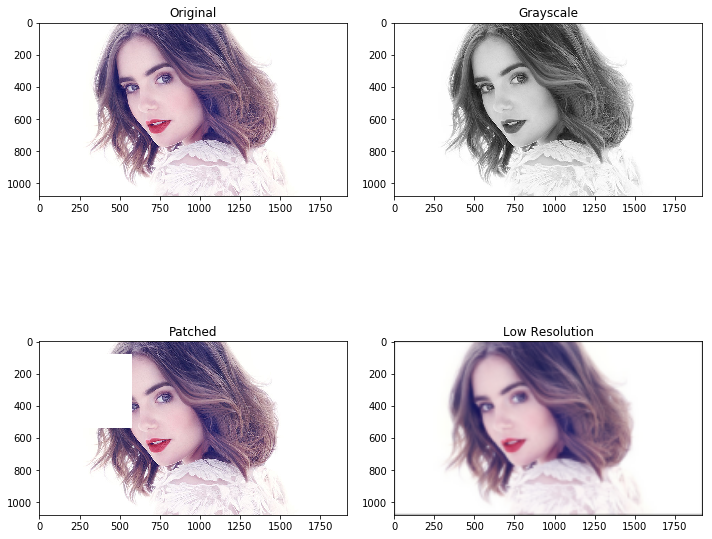

In [60]:
original = imread('test.jpg')
grayscale = GrayScalePL(original)
patched = RandomPatchPL(original, patch_size = 10, channels = "RGB", fill_value = 255, degree = 0)
low_res = SuperResolutionPL(original, scale=0.1)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
ax[2].imshow(patched)
ax[2].set_title("Patched")
ax[3].imshow(low_res)
ax[3].set_title("Low Resolution")

fig.tight_layout()
plt.show()